# 1. Load Libraries and Data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load transaction and customer datasets
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')
customer_data = pd.read_csv('QVI_purchase_behaviour.csv')

# 2. Data Exploration

In [30]:
# Examine the structure of the data
print(transaction_data.info())
print(transaction_data.head())
print(customer_data.info())
print(customer_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                   

In [31]:
# Convert DATE column to datetime format
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')


In [32]:
print(transaction_data.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [33]:
# Summary statistics and missing values
print(transaction_data.describe())
print(transaction_data.isnull().sum())

                                DATE     STORE_NBR  LYLTY_CARD_NBR  \
count                         264836  264836.00000    2.648360e+05   
mean   2018-12-30 00:52:12.879215616     135.08011    1.355495e+05   
min              2018-07-01 00:00:00       1.00000    1.000000e+03   
25%              2018-09-30 00:00:00      70.00000    7.002100e+04   
50%              2018-12-30 00:00:00     130.00000    1.303575e+05   
75%              2019-03-31 00:00:00     203.00000    2.030942e+05   
max              2019-06-30 00:00:00     272.00000    2.373711e+06   
std                              NaN      76.78418    8.057998e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.648360e+05  264836.000000  264836.000000  264836.000000  
mean   1.351583e+05      56.583157       1.907309       7.304200  
min    1.000000e+00       1.000000       1.000000       1.500000  
25%    6.760150e+04      28.000000       2.000000       5.400000  
50%    1.351375e+05      56.000000

In [34]:
# Check for products that are not chips
non_chips = transaction_data[~transaction_data['PROD_NAME'].str.contains('chip|Chips', case=False)]
print(f"Non-chip products: {non_chips['PROD_NAME'].unique()}")

Non-chip products: ['CCs Nacho Cheese    175g' 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Grain Waves         Sweet Chilli 210g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'CCs Original 175g'
 'Burger Rings 220g' 'NCC Sour Cream &    Garden Chives 175g'
 'Cheezels Cheese Box 125g' 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock Deli SR    Salsa & Mzzrlla 150g'
 'Red Rock Deli Sp    Salt & Truffle 150G'
 'Smiths Thinly       Swt Chli&S/Cream175G' 'Kettle Chilli 175g'
 'Doritos Mexicana    170g' 'Smiths Crinkle Cut  French OnionDip 150g'
 'Dorito Corn Chp     Supreme 380g' 'Twisties Chicken270g'
 'Smiths Thinly Cut   Roast Chicken 175g'

In [35]:
# Remove salsa products
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa', case=False)]
print(transaction_data)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [36]:
# Identify and remove outliers (e.g., customers buying 200 packs in one transaction)
outliers = transaction_data[transaction_data['PROD_QTY'] == 200]
print(outliers)
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != outliers['LYLTY_CARD_NBR'].iloc[0]]


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


# 3. Feature Engineering

In [37]:
# Extract pack size from product names
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(float)


In [38]:
transaction_data['PACK_SIZE']

0         175.0
1         175.0
2         170.0
3         175.0
4         150.0
          ...  
264831    175.0
264832    175.0
264833    170.0
264834    150.0
264835    175.0
Name: PACK_SIZE, Length: 246740, dtype: float64

In [39]:
# Extract brand from product names
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0].str.upper()
transaction_data['BRAND'] 

0          NATURAL
1              CCS
2           SMITHS
3           SMITHS
4           KETTLE
            ...   
264831      KETTLE
264832    TOSTITOS
264833     DORITOS
264834     DORITOS
264835    TOSTITOS
Name: BRAND, Length: 246740, dtype: object

In [40]:
# Consolidate similar brand names
brand_mapping = {
    "RED": "RRD",
    "SNBTS": "SUNBITES",
    "INFZNS": "INFUZIONS",
    "WW": "WOOLWORTHS",
    "SMITH": "SMITHS",
    "NCC": "NATURAL",
    "DORITO": "DORITOS",
    "GRAIN": "GRNWVES"
}
transaction_data['BRAND'] = transaction_data['BRAND'].replace(brand_mapping)

# 4. Data Merging

In [41]:
# Merge transaction and customer data
data = pd.merge(transaction_data, customer_data, how='left', on='LYLTY_CARD_NBR')
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,KETTLE,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,TOSTITOS,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,DORITOS,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,DORITOS,YOUNG SINGLES/COUPLES,Premium


In [42]:
# Check for unmatched customers
print(data[data['LIFESTAGE'].isnull()])

Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PACK_SIZE, BRAND, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


# 5. Analysis by Customer Segments

In [46]:
# Total sales by life stage and premium category
sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


In [48]:
# Number of customers per segment
customers = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2231
9,OLDER SINGLES/COUPLES,Budget,4849


In [49]:
# Average units purchased per customer
avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique()
).reset_index(name='AVG_UNITS')
avg_units

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_UNITS
0,MIDAGE SINGLES/COUPLES,Budget,6.026459
1,MIDAGE SINGLES/COUPLES,Mainstream,6.432080
2,MIDAGE SINGLES/COUPLES,Premium,6.078514
3,NEW FAMILIES,Budget,4.821527
4,NEW FAMILIES,Mainstream,4.891566
5,NEW FAMILIES,Premium,4.815652
6,OLDER FAMILIES,Budget,9.076773
7,OLDER FAMILIES,Mainstream,9.255380
8,OLDER FAMILIES,Premium,9.071717
9,OLDER SINGLES/COUPLES,Budget,6.781398


In [50]:
# Average price per unit
avg_price = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()
).reset_index(name='AVG_PRICE')
avg_price

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,3.753878
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994449
2,MIDAGE SINGLES/COUPLES,Premium,3.780823
3,NEW FAMILIES,Budget,3.931969
4,NEW FAMILIES,Mainstream,3.935887
5,NEW FAMILIES,Premium,3.886168
6,OLDER FAMILIES,Budget,3.747969
7,OLDER FAMILIES,Mainstream,3.736380
8,OLDER FAMILIES,Premium,3.717703
9,OLDER SINGLES/COUPLES,Budget,3.887529


# 6. Segment Deep Dive

In [53]:
# Analyze brand and pack size preferences for a specific segment
segment = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]
other = data[~((data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream'))]


In [55]:

# Brand affinity
brand_affinity = segment['BRAND'].value_counts(normalize=True) / other['BRAND'].value_counts(normalize=True)
brand_affinity


BRAND
BURGER        0.479854
CCS           0.596146
CHEETOS       0.698922
CHEEZELS      0.944843
COBS          1.137600
DORITOS       1.210572
FRENCH        0.676670
GRNWVES       1.058592
INFUZIONS     1.122003
KETTLE        1.193406
NATURAL       0.647377
PRINGLES      1.181003
RRD           0.658536
SMITHS        0.785429
SUNBITES      0.516660
THINS         1.050009
TOSTITOS      1.205700
TWISTIES      1.223096
TYRRELLS      1.235751
WOOLWORTHS    0.490297
Name: proportion, dtype: float64

In [56]:
# Pack size affinity
pack_affinity = segment['PACK_SIZE'].value_counts(normalize=True) / other['PACK_SIZE'].value_counts(normalize=True)

pack_affinity

PACK_SIZE
70.0     0.507178
90.0     0.516660
110.0    1.172431
125.0    0.491660
134.0    1.181003
135.0    1.136234
150.0    0.964484
160.0    0.523568
165.0    0.902471
170.0    0.994629
175.0    0.946189
180.0    0.582074
190.0    0.604312
200.0    0.484594
210.0    1.175546
220.0    0.479854
250.0    1.126673
270.0    1.272269
330.0    1.224477
380.0    1.256849
Name: proportion, dtype: float64

# 7. Visualizations

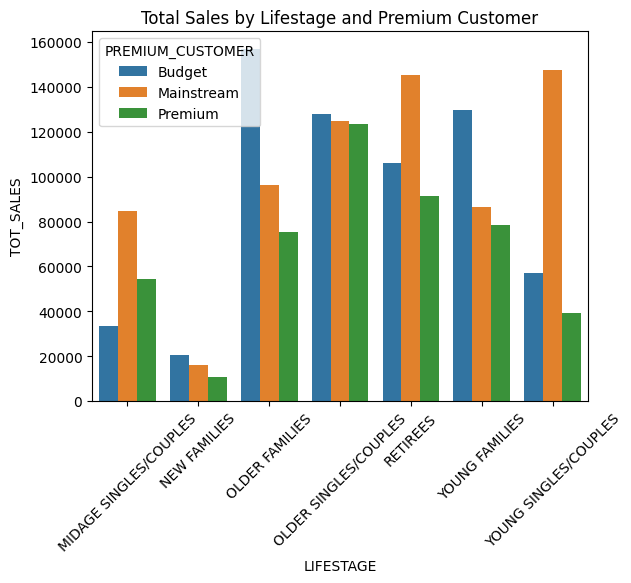

In [57]:

# Total sales plot
sns.barplot(data=sales, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.show()



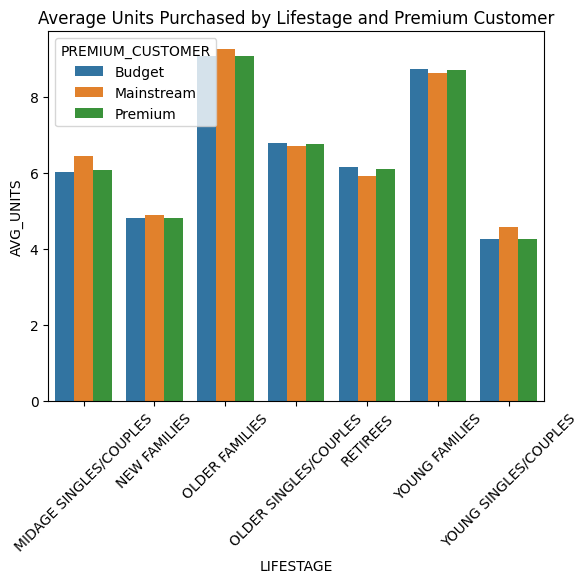

In [58]:
# Average units plot
sns.barplot(data=avg_units, x='LIFESTAGE', y='AVG_UNITS', hue='PREMIUM_CUSTOMER')
plt.title('Average Units Purchased by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.show()



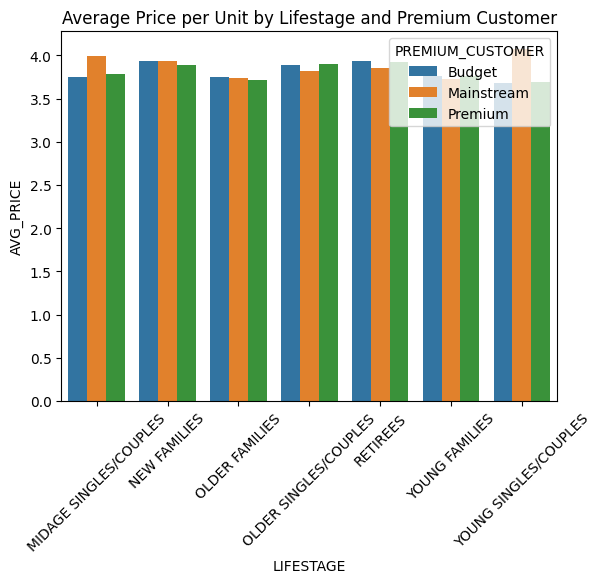

In [59]:
# Average price plot
sns.barplot(data=avg_price, x='LIFESTAGE', y='AVG_PRICE', hue='PREMIUM_CUSTOMER')
plt.title('Average Price per Unit by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.show()



# 8. Conclusions

In [60]:

print("Key findings and insights:")
print("- Older families in the Budget category spend the most on chips.")
print("- Mainstream young singles/couples have high brand and pack size affinities.")

Key findings and insights:
- Older families in the Budget category spend the most on chips.
- Mainstream young singles/couples have high brand and pack size affinities.
